In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  


In [6]:
AllData=pd.read_csv(r'C:\Users\saurabh\Documents\Desktop\Data Science projects\Other Projects\RocketLabTelemetry\RocketLabFailTelem.csv')
AllData.at[5,'Speed']=7689
AllData.at[10,'Speed']=7889
#AllData['5']['Speed']=7689
#AllData['10']['Speed']=7889
#error

In [7]:
AllData[:4]

,Time,Speed,Altitude
0,0.000000,7516,60.0
1,0.362069,7544,60.2
2,0.724138,7593,60.7
3,1.086207,7625,61.0


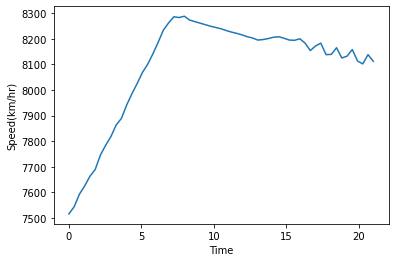

In [8]:
plt.plot(AllData['Time'],AllData['Speed'])
plt.xlabel('Time')
plt.ylabel('Speed(km/hr)')
plt.show()

In [9]:
Acceleration=[(AllData.iloc[i+1]-AllData.iloc[i])*5/(0.36*18)  for i in range(len(AllData)-1)]
Acceleration.append(Acceleration[-1])


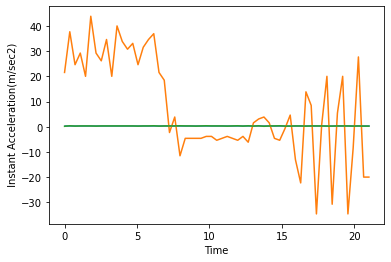

In [15]:
plt.plot(AllData['Time'],Acceleration)
plt.xlabel('Time')
plt.ylabel(' Instant Acceleration(m/sec2)')
plt.show()

In [16]:
InstantAcceleration=[]
N=len(AllData)
for i in range(1,N-1):
    temp1=((AllData.iloc[i]['Speed']-AllData.iloc[0]['Speed'])*5/18)/(AllData.iloc[i]['Time']-AllData.iloc[0]['Time'])
    temp2=((AllData.iloc[N-1]['Speed']-AllData.iloc[i]['Speed'])*5/18)/(AllData.iloc[N-1]['Speed']-AllData.iloc[i]['Time'])
    InstantAcceleration.append((temp1+temp2)/2)

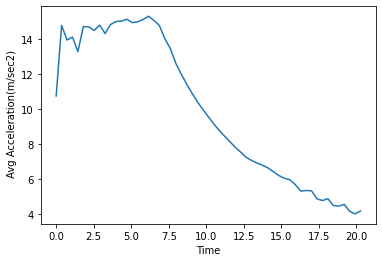

In [17]:
plt.plot(AllData['Time'][:57],InstantAcceleration)
plt.xlabel('Time')
plt.ylabel(' Avg Acceleration(m/sec2)')
plt.show()
#Not Useful

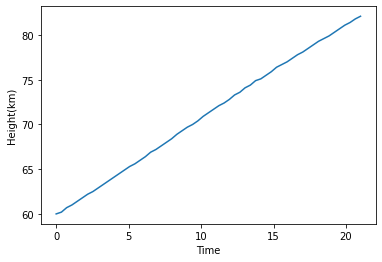

In [28]:
plt.plot(AllData['Time'],AllData['Altitude'])
plt.xlabel('Time')
plt.ylabel('Height(km)')
plt.show()

In [18]:
TumbleData=pd.read_csv(r'C:\Users\saurabh\Documents\Desktop\Data Science projects\Other Projects\RocketLabTelemetry\RocketLabFail2.csv')
TumbleData[:5]

,Time,Speed
0,0.000000,8083
1,0.130435,8091
2,0.260870,8103
3,0.391304,8109
4,0.521739,8119


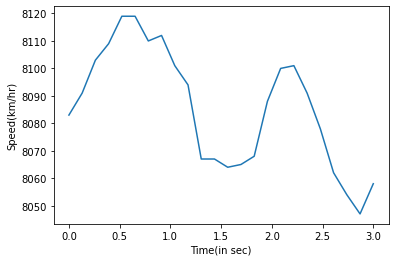

In [19]:
plt.plot(TumbleData['Time'],TumbleData['Speed'])
plt.xlabel('Time(in sec)')
plt.ylabel('Speed(km/hr)')
plt.show()

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


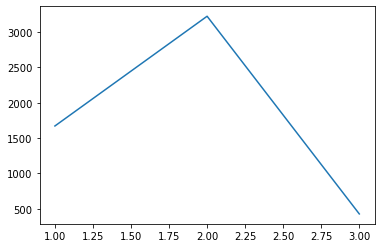

In [20]:
import numpy as np  
fhat=np.fft.fft(TumbleData['Speed'],len(TumbleData))
PSD=fhat*np.conj(fhat)/len(TumbleData)
freq=np.arange(4)
L=np.arange(1,np.floor(4),dtype='int')
plt.plot(freq[L],PSD[L])

In [8]:
#Hence Time Period of about 2sec in Tumbling of Rocket